In [17]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
import missingno
%matplotlib inline
import IPython
from sklearn.model_selection import train_test_split
import plotly.express as px
import plotly.graph_objects as go
sns.set(style="whitegrid") # set the background for the graphs

In [18]:
df = pd.read_csv('shootings_datset.csv')
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,1/2/2015,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,1/2/2015,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,1/3/2015,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,1/4/2015,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,1/4/2015,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,5916,Rayshard Brooks,6/12/2020,shot,Taser,27.0,M,Black,Atlanta,GA,False,attack,Foot,True,Electrical devices
4891,5925,Caine Van Pelt,6/12/2020,shot,gun,23.0,M,Black,Crown Point,IN,False,attack,Car,False,Guns
4892,5918,Hannah Fizer,6/13/2020,shot,unarmed,25.0,F,White,Sedalia,MO,False,other,Not fleeing,False,Unarmed
4893,5921,William Slyter,6/13/2020,shot,gun,22.0,M,White,Kansas City,MO,False,other,Other,False,Guns


In [19]:
# separating x and y
x = df.drop('name', axis = 1)
y = df['name']
x

,id,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,1/2/2015,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,1/2/2015,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,1/3/2015,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,1/4/2015,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,1/4/2015,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,5916,6/12/2020,shot,Taser,27.0,M,Black,Atlanta,GA,False,attack,Foot,True,Electrical devices
4891,5925,6/12/2020,shot,gun,23.0,M,Black,Crown Point,IN,False,attack,Car,False,Guns
4892,5918,6/13/2020,shot,unarmed,25.0,F,White,Sedalia,MO,False,other,Not fleeing,False,Unarmed
4893,5921,6/13/2020,shot,gun,22.0,M,White,Kansas City,MO,False,other,Other,False,Guns


In [20]:
# displaying entire dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       4895 non-null   int64  
 1   name                     4895 non-null   object 
 2   date                     4895 non-null   object 
 3   manner_of_death          4895 non-null   object 
 4   armed                    4895 non-null   object 
 5   age                      4895 non-null   float64
 6   gender                   4895 non-null   object 
 7   race                     4895 non-null   object 
 8   city                     4895 non-null   object 
 9   state                    4895 non-null   object 
 10  signs_of_mental_illness  4895 non-null   bool   
 11  threat_level             4895 non-null   object 
 12  flee                     4895 non-null   object 
 13  body_camera              4895 non-null   bool   
 14  arms_category           

In [30]:
#print the data dtypes of each column
df.dtypes

id                           int64
name                        object
date                        object
manner_of_death             object
armed                       object
age                        float64
gender                      object
race                        object
city                        object
state                       object
signs_of_mental_illness       bool
threat_level                object
flee                        object
body_camera                   bool
arms_category               object
dtype: object

In [34]:
#change the object to categories data 
df.name= df['name'].astype('category')
df.manner_of_death = df['manner_of_death'].astype('category')
df.armed = df['armed'].astype('category')
df.gender = df['gender'].astype('category')
df.race=df['race'].astype('category')
df.city=df['city'].astype('category')
df.state=df['state'].astype('category')
df.threat_level=df['threat_level'].astype('category')
df.flee=df['flee'].astype('category')
df.arms_category=df['arms_category'].astype('category')

In [35]:
#change the age value to an integer because no one has a floating age
df.age = pd.Series(data=df.age, dtype='int')

In [38]:
#show empty columns fields
df.isnull()
#summerize
df.isnull().sum()

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
arms_category              0
dtype: int64

In [39]:
#show the various data columns
df.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'arms_category'],
      dtype='object')

In [37]:
#print out data fields which duplicated is summerized
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4890    False
4891    False
4892    False
4893    False
4894    False
Length: 4895, dtype: bool

In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,4895.0,2902.148519,1683.467910,3.0,1441.5,2847.0,4352.5,5925.0
age,4895.0,36.547702,12.694266,6.0,27.0,35.0,45.0,91.0


In [41]:
#value count of each data values
df.age.value_counts()
df.armed.value_counts()
df.city.value_counts()
df.state.value_counts()
df.manner_of_death.value_counts()
df.signs_of_mental_illness.value_counts()
df.threat_level.value_counts()
df.flee.value_counts()
df.body_camera.value_counts()
df.arms_category.value_counts()

Guns                     2764
Sharp objects             818
Unknown                   418
Unarmed                   348
Other unusual objects     192
Blunt instruments         122
Vehicles                  121
Multiple                   54
Piercing objects           29
Electrical devices         24
Explosives                  4
Hand tools                  1
Name: arms_category, dtype: int64

In [ ]:
#plot the data values
plt.title('Age with density')
sns.kdeplot(data=shooting_data['age'])

In [21]:
# Analysing dataset and saving to html file
analyze_report = sv.analyze(df)
analyze_report.show_html('shootings_analysis.html', open_browser = False)

                                             |                                             | [  0%]   00:00 ->…

Report shootings_analysis.html was generated.



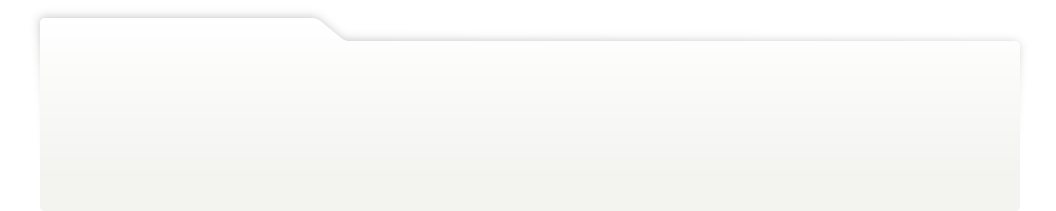
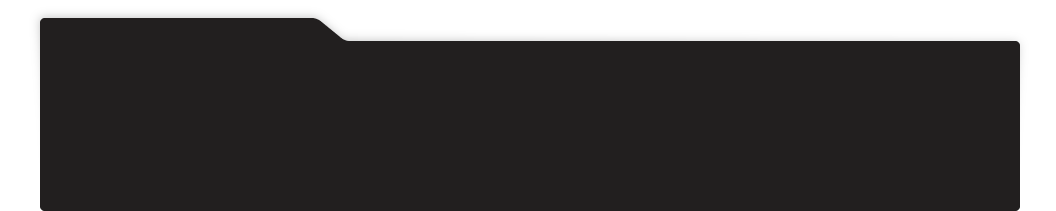
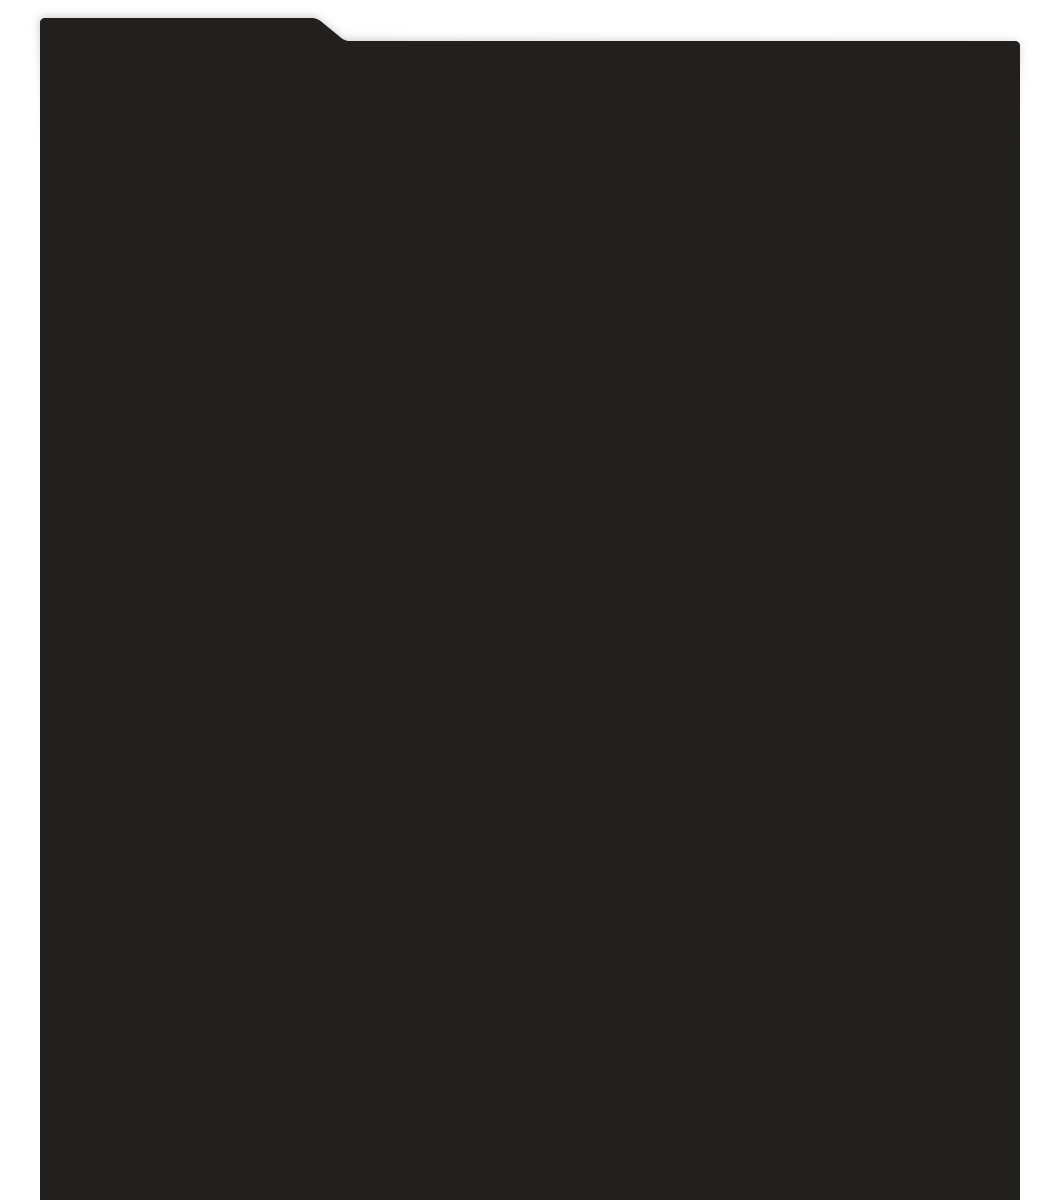
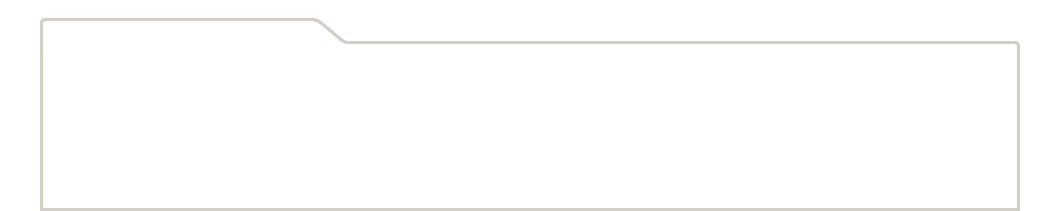
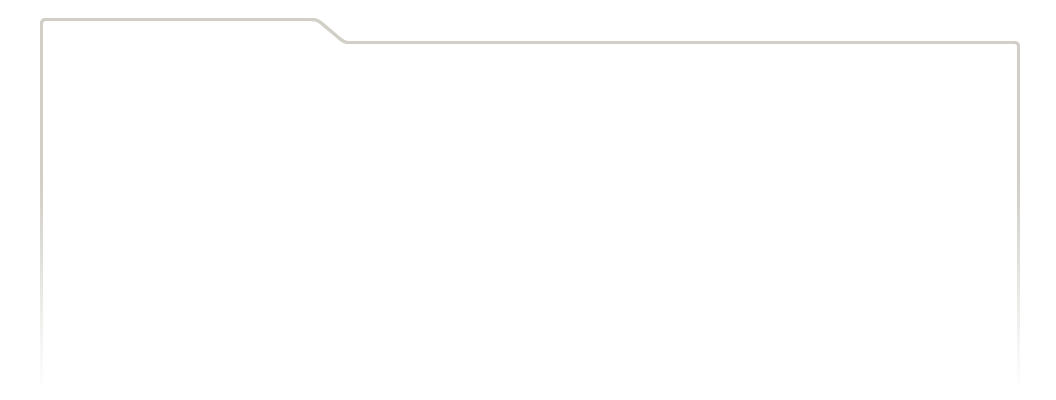
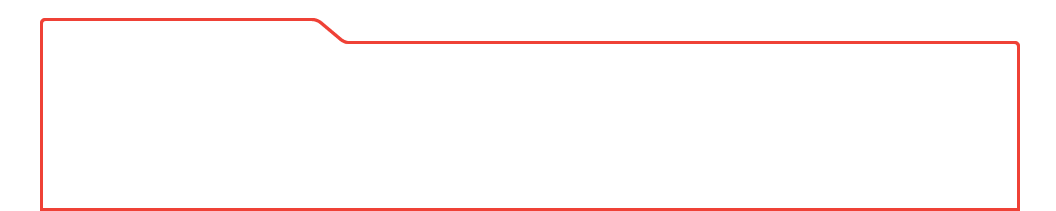
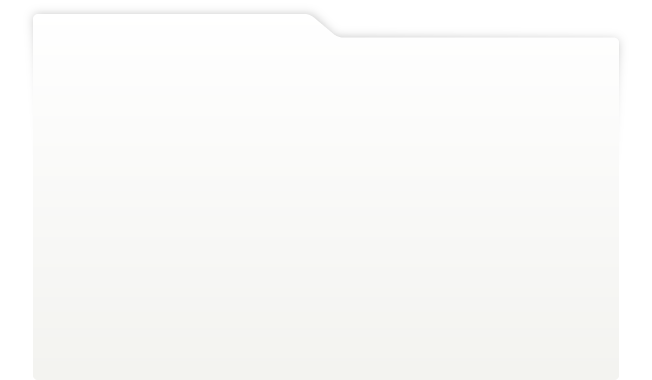
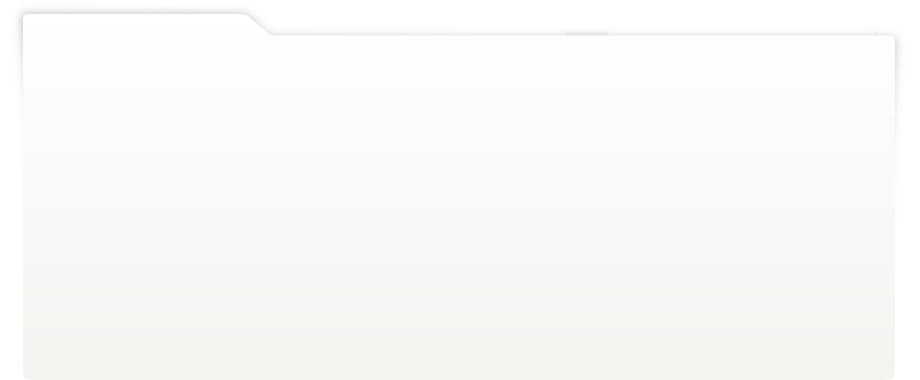
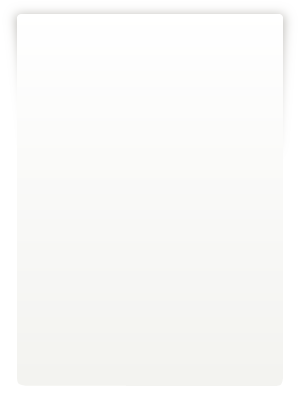
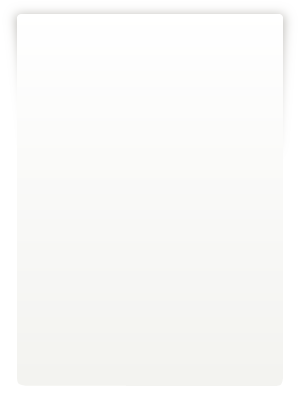
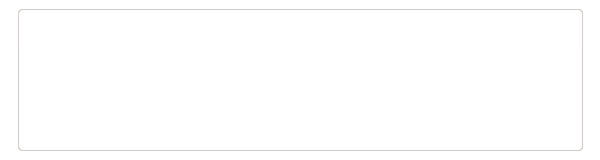
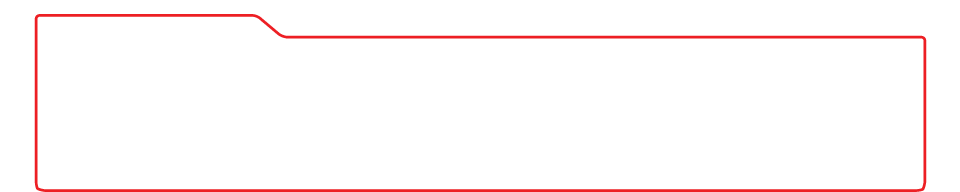
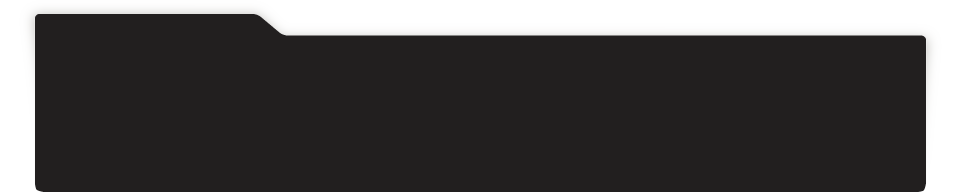
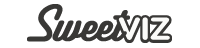
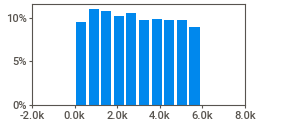
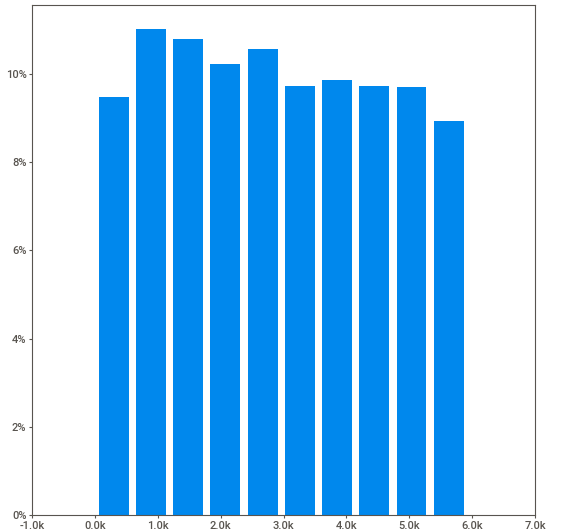
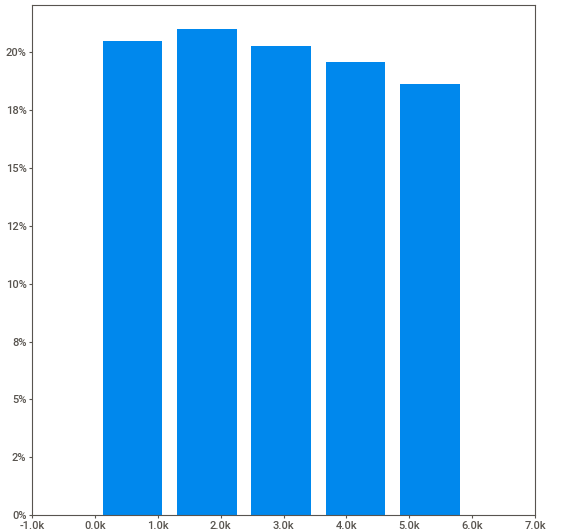
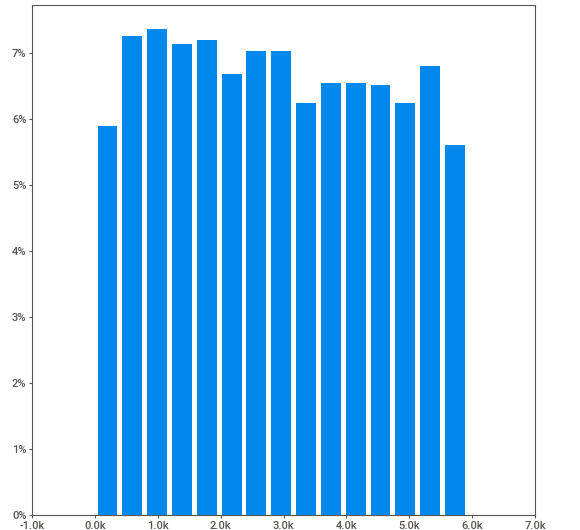
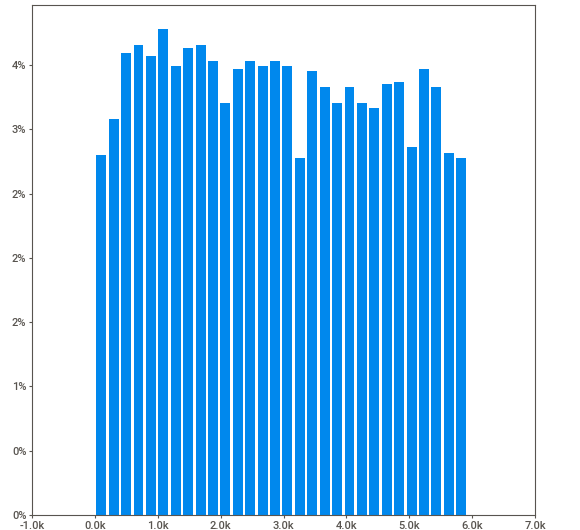
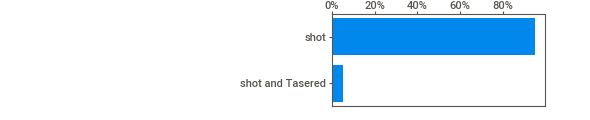
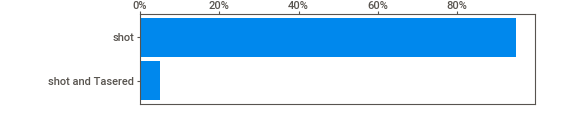
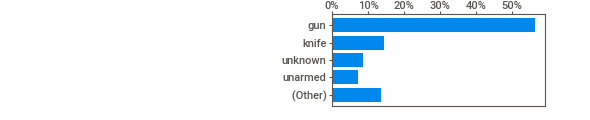
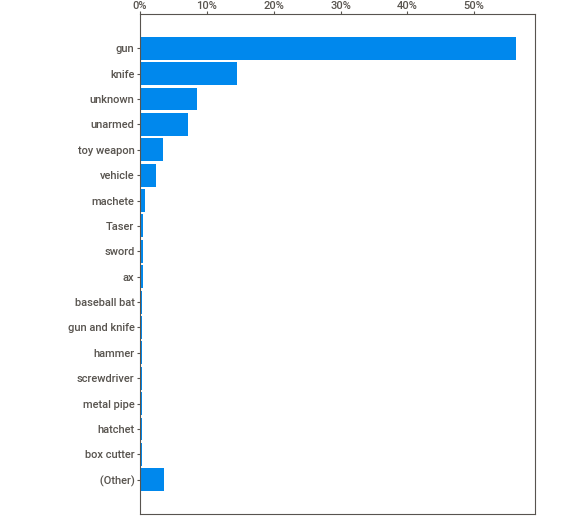
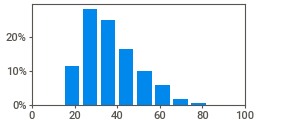
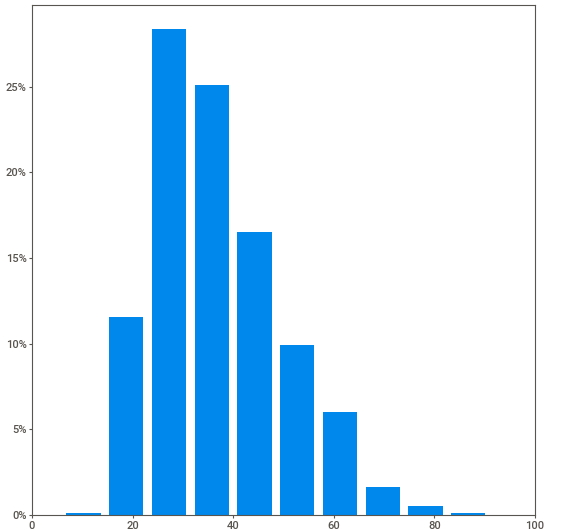
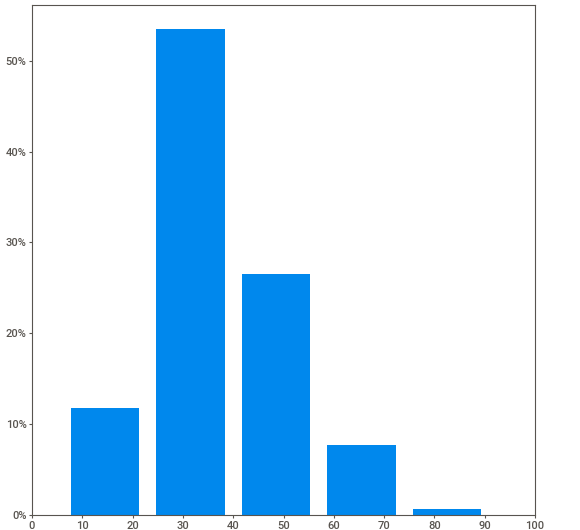
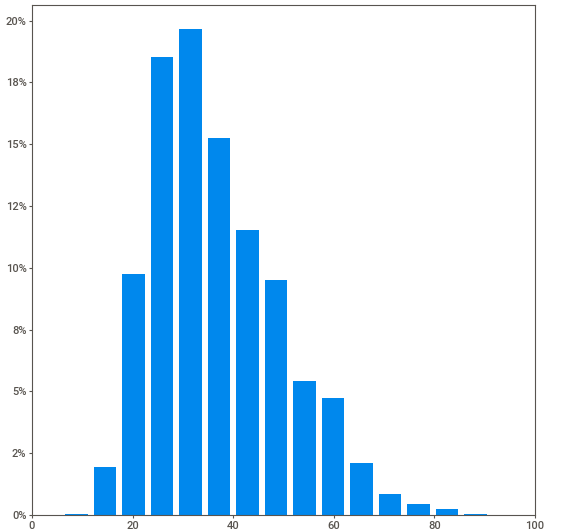
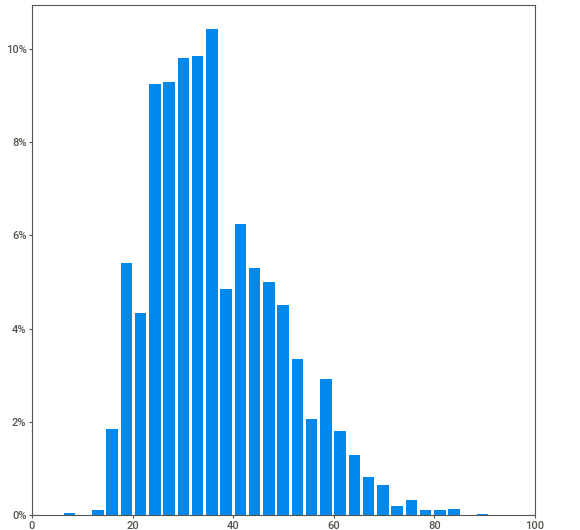
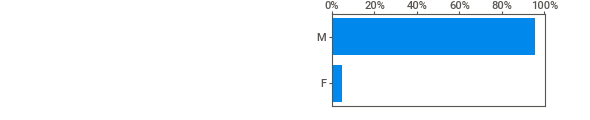
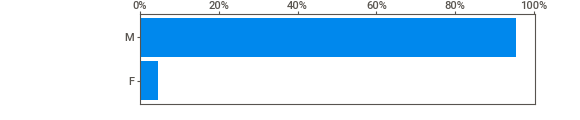
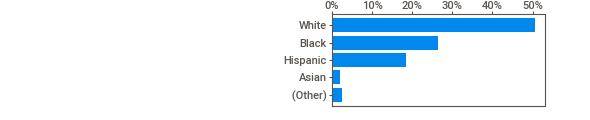
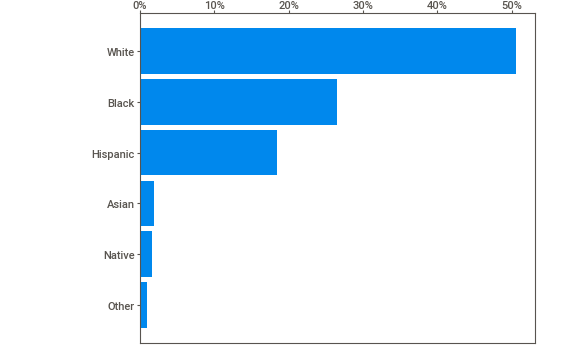
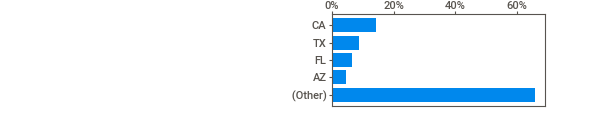
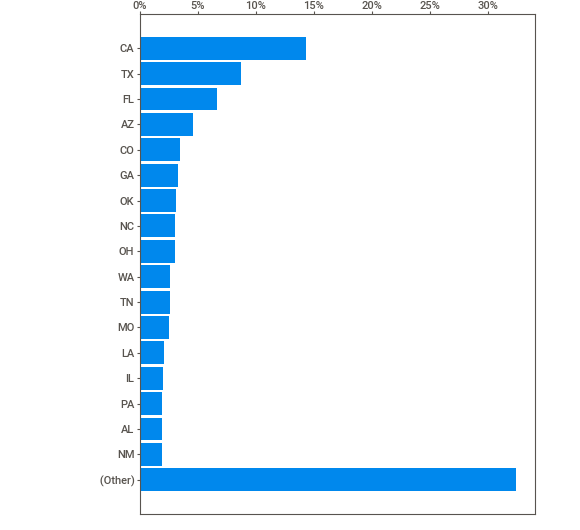
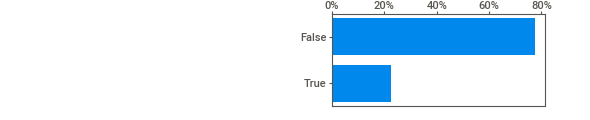
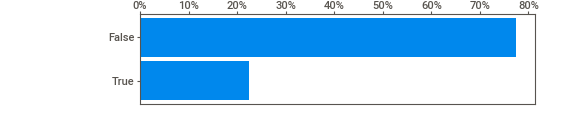
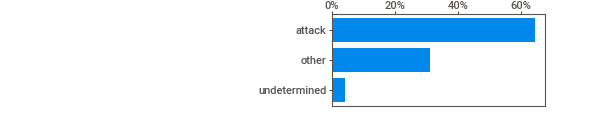
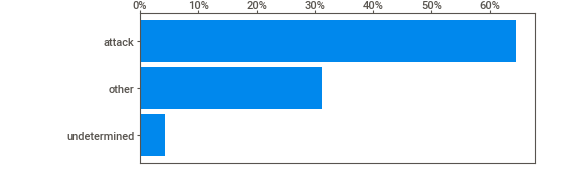
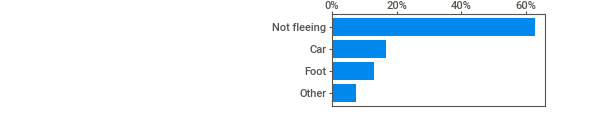
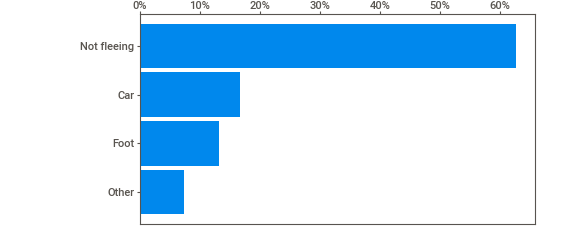
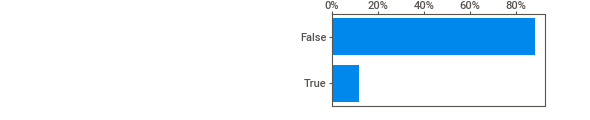
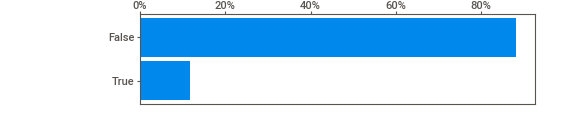
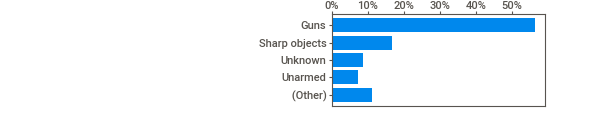
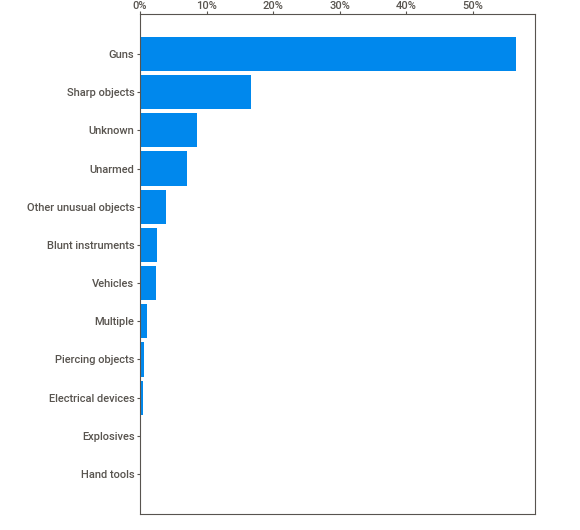
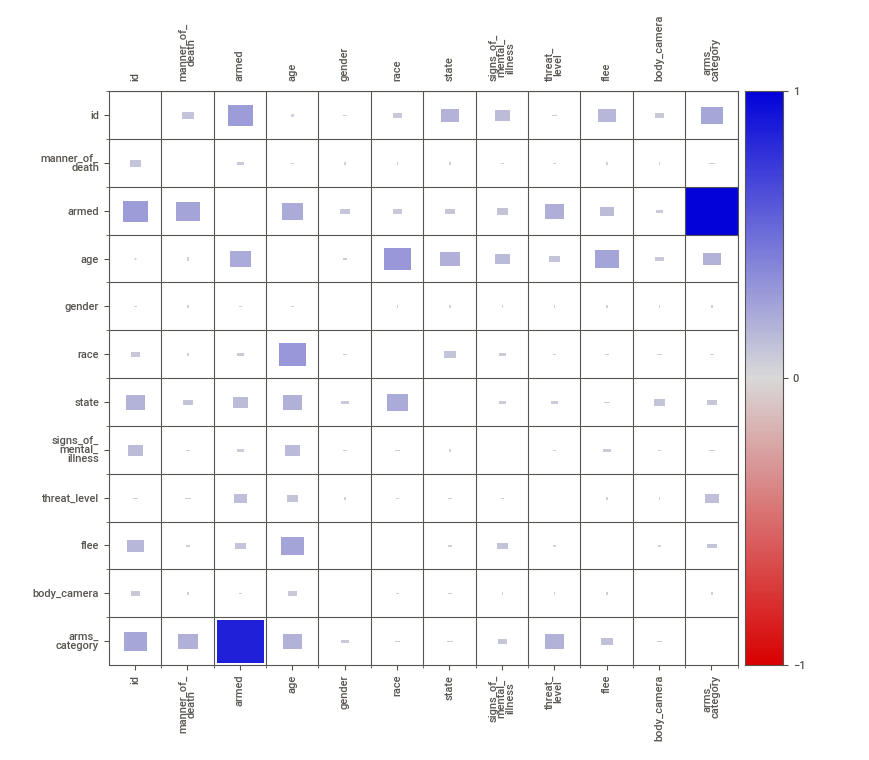
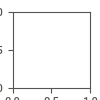

In [22]:
# displaying analysis 
IPython.display.HTML('shootings_analysis.html')

In [23]:
# Training and testing model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

x_train

,id,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
3404,3989,8/24/2018,shot,toy weapon,20.000000,M,Black,Cincinnati,OH,False,attack,Not fleeing,True,Other unusual objects
1868,2179,12/31/2016,shot and Tasered,unarmed,33.000000,M,White,Mankato,MN,False,attack,Not fleeing,False,Unarmed
4730,5696,3/28/2020,shot,gun,46.000000,M,White,Caldwell,ID,False,attack,Not fleeing,False,Guns
3661,4335,12/31/2018,shot,gun,45.000000,M,White,Fort Dodge,IA,False,attack,Car,False,Guns
4039,4772,6/8/2019,shot,ax,33.000000,F,Hispanic,Fresno,CA,True,attack,Not fleeing,True,Blunt instruments
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658,801,9/4/2015,shot and Tasered,metal pipe,49.000000,M,Hispanic,French Lick,IN,False,attack,Not fleeing,False,Blunt instruments
4709,5651,3/18/2020,shot,gun,61.000000,M,Black,Iota,LA,False,other,Other,False,Guns
2397,2785,7/17/2017,shot,gun,37.000000,M,Hispanic,San Antonio,TX,False,attack,Not fleeing,False,Guns
279,367,4/15/2015,shot,unarmed,41.000000,M,Black,Houston,TX,False,other,Car,False,Unarmed


In [24]:
x_test

,id,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
2075,2415,3/10/2017,shot,gun,40.0,M,White,Escondido,CA,True,attack,Not fleeing,False,Guns
4064,4802,6/17/2019,shot,gun,22.0,M,White,Dallas,TX,True,attack,Foot,False,Guns
2273,2636,6/4/2017,shot,gun,66.0,M,White,Campo,CA,True,attack,Not fleeing,False,Guns
242,263,3/31/2015,shot,unknown,27.0,F,Black,Fort Meade,MD,False,other,Car,False,Unknown
3784,4478,2/16/2019,shot,gun,34.0,M,Asian,Clinton,MS,False,attack,Not fleeing,False,Guns
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4177,4954,8/5/2019,shot,gun,43.0,M,White,Pocahontas County,WV,False,attack,Car,False,Guns
2209,2567,5/8/2017,shot,rock,32.0,M,Black,Rancho Cordova,CA,True,attack,Foot,False,Blunt instruments
3976,4722,5/14/2019,shot,gun,54.0,M,White,Las Vegas,NV,True,other,Not fleeing,False,Guns
3648,4325,12/25/2018,shot,gun,34.0,M,Hispanic,Buckeye,AZ,False,attack,Not fleeing,False,Guns


In [25]:
# Comparing dataset, train and test
compare_report = sv.compare([x_train, 'Train'], [x_test, 'Test'])
compare_report.show_html('shootings_comparison.html', open_browser = False)

                                             |                                             | [  0%]   00:00 ->…

Report shootings_comparison.html was generated.



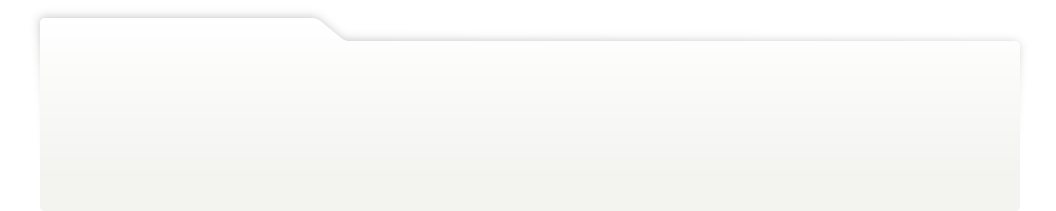
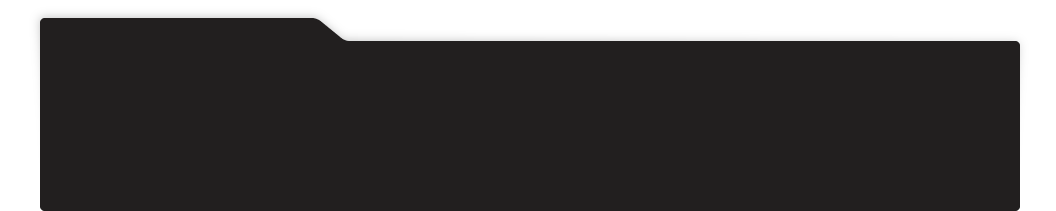
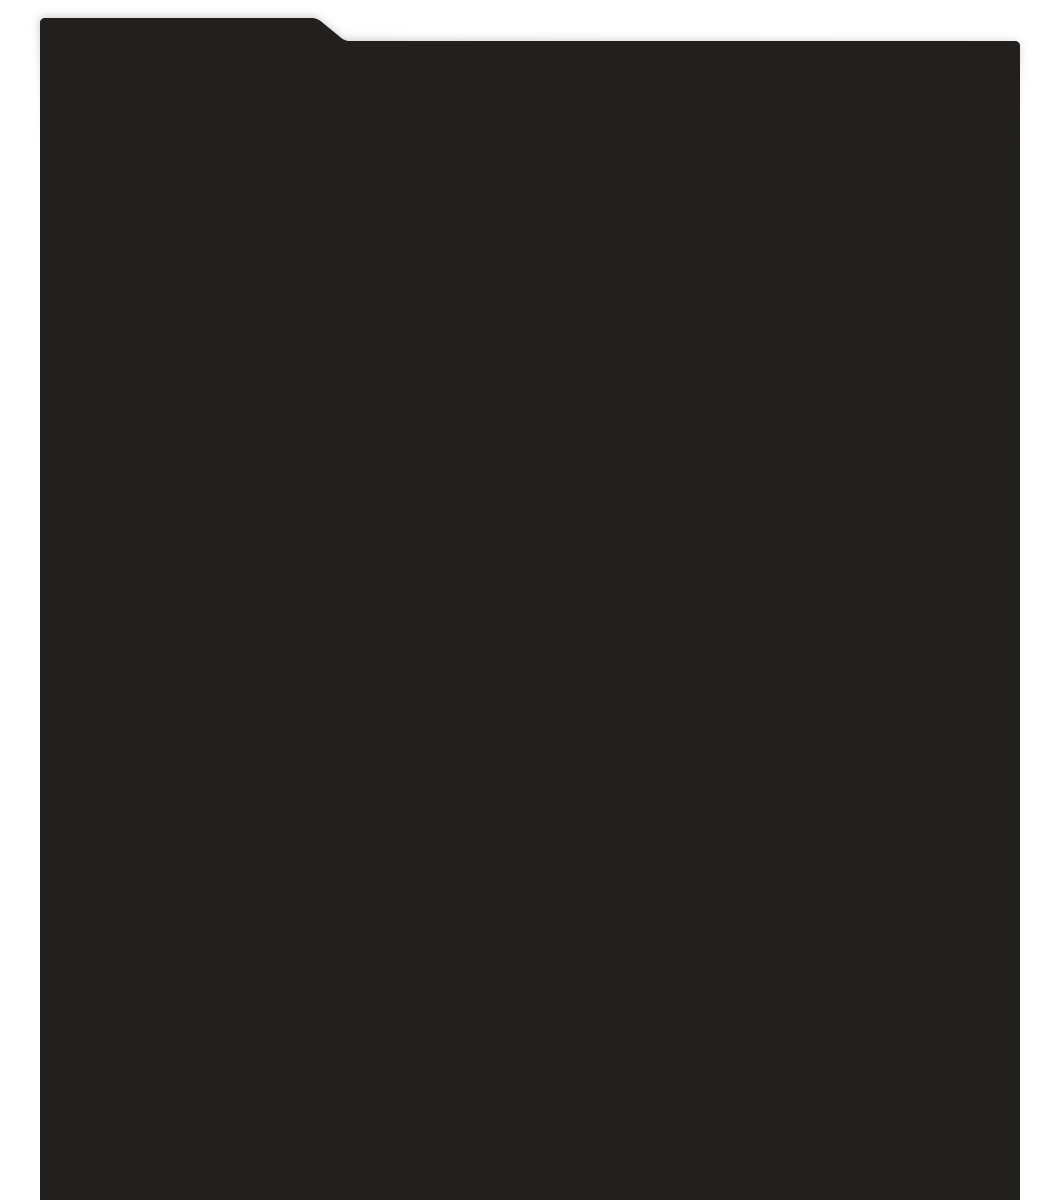
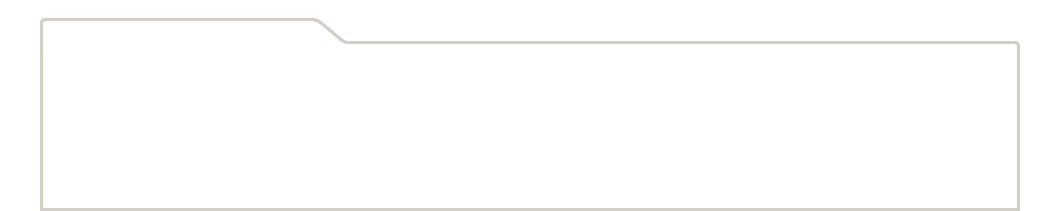
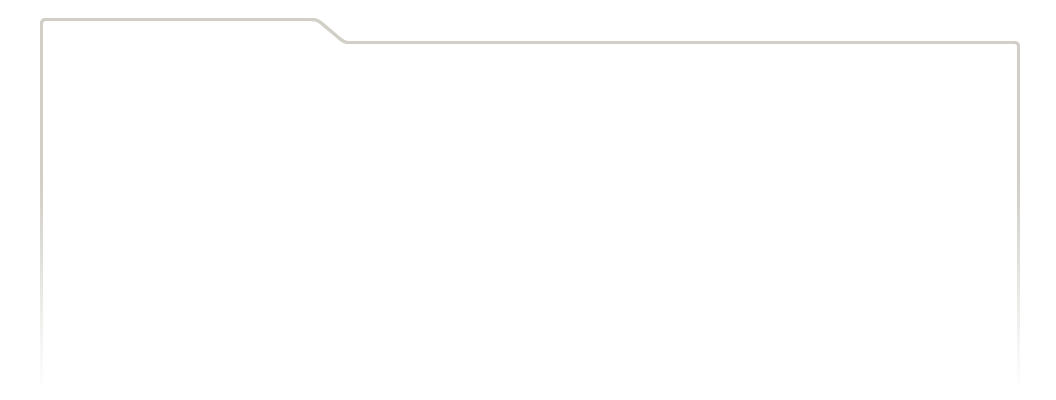
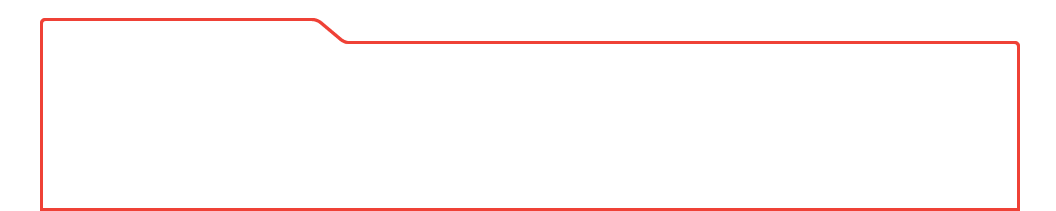
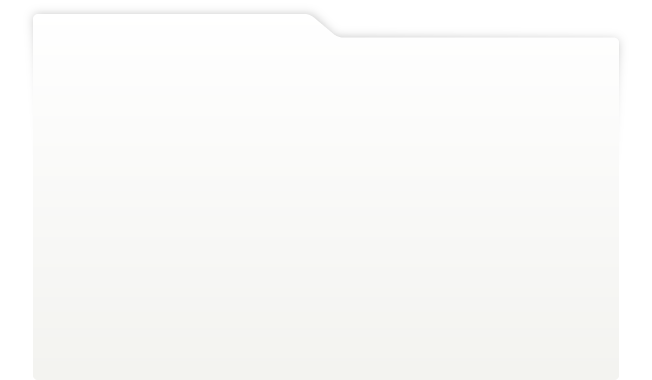
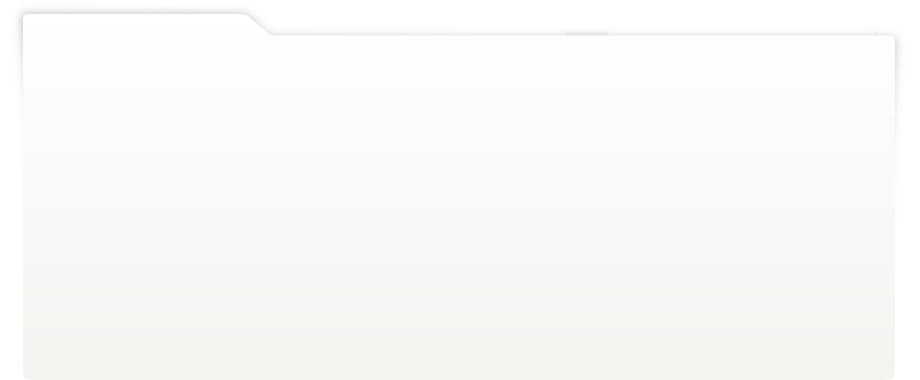
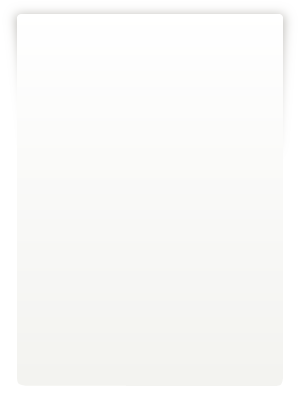
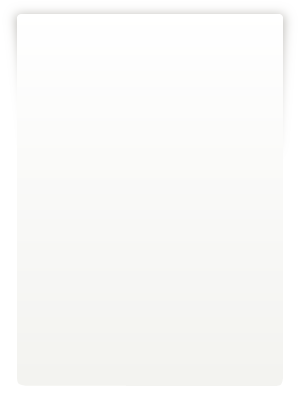
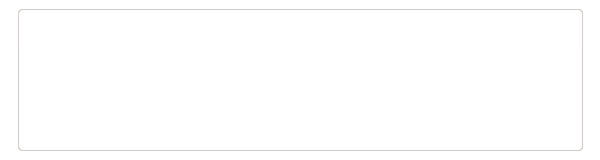
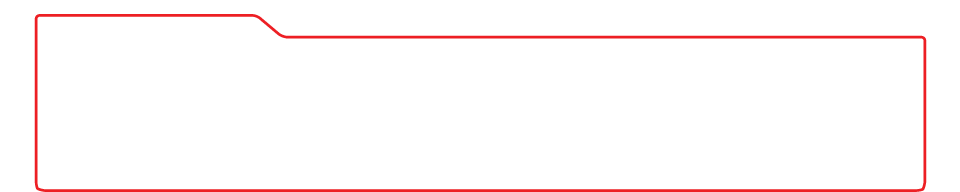
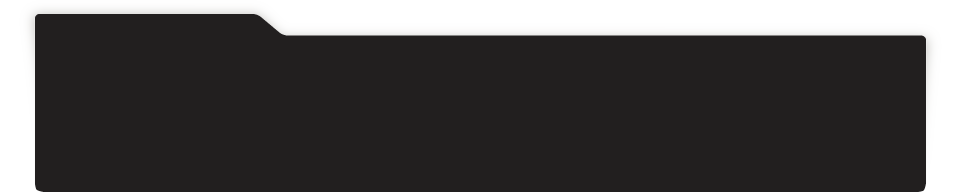
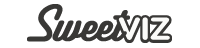
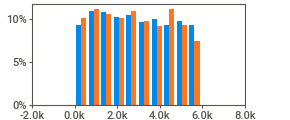
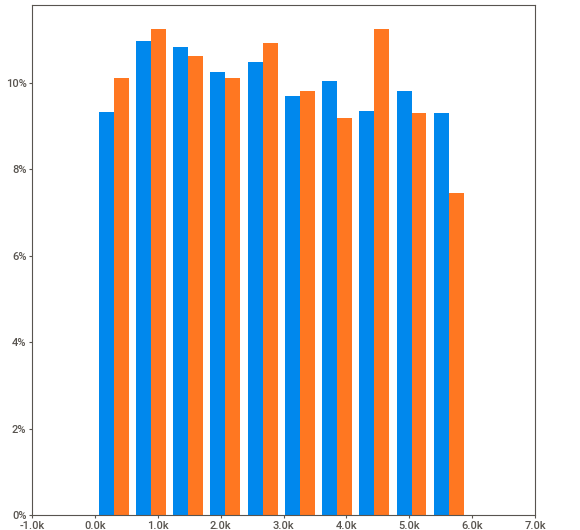
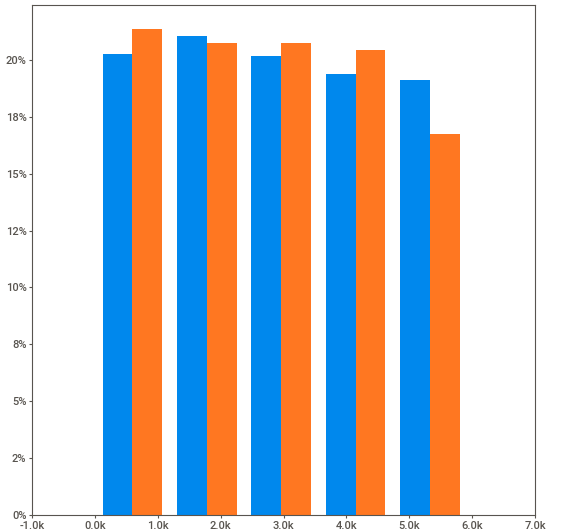
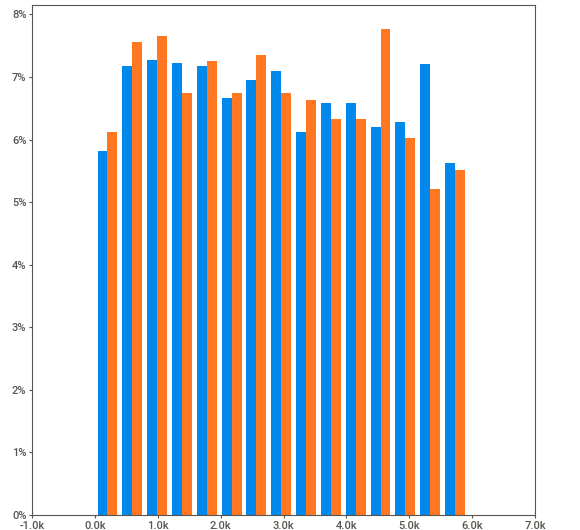
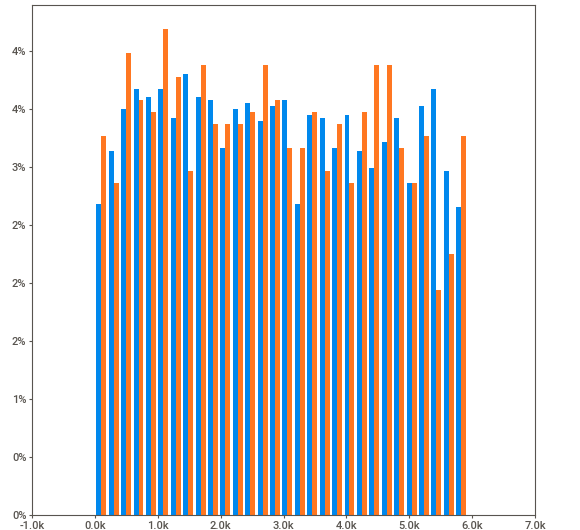
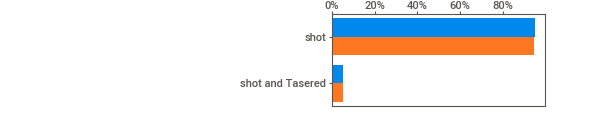
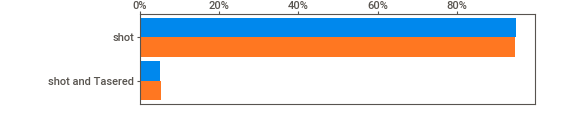
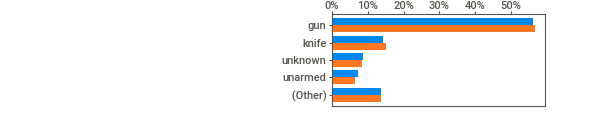
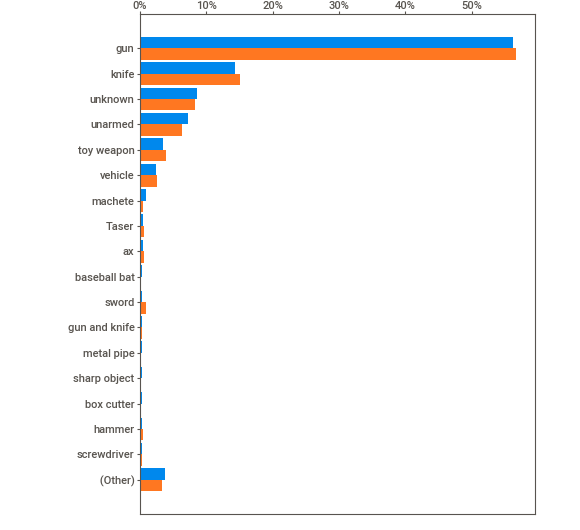
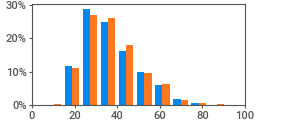
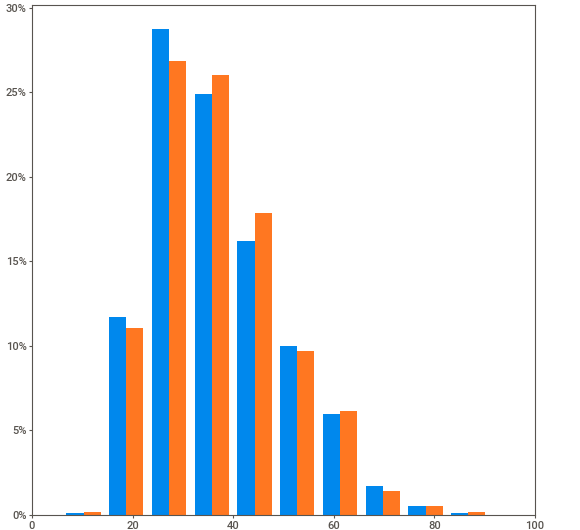
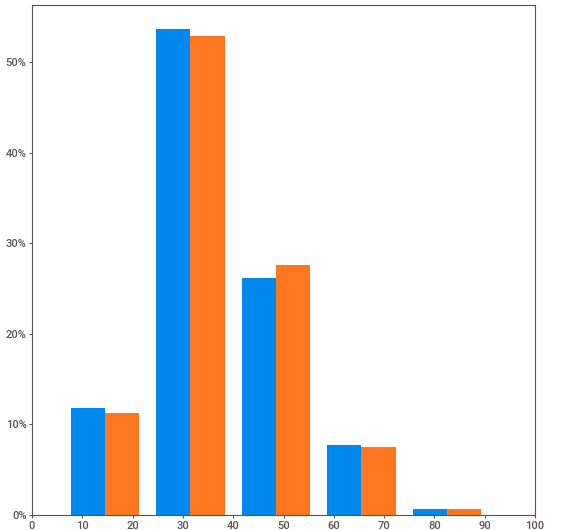
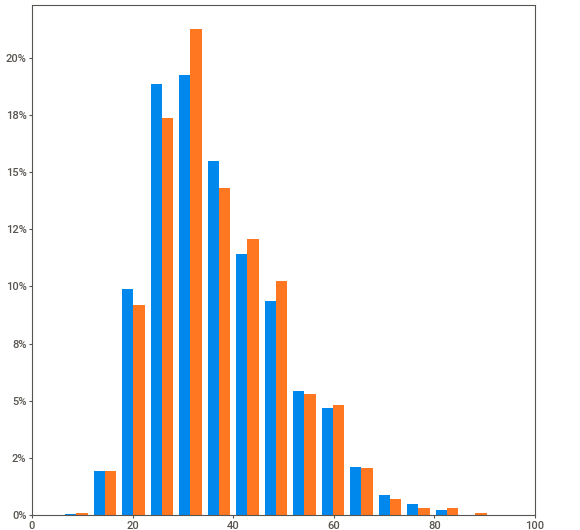
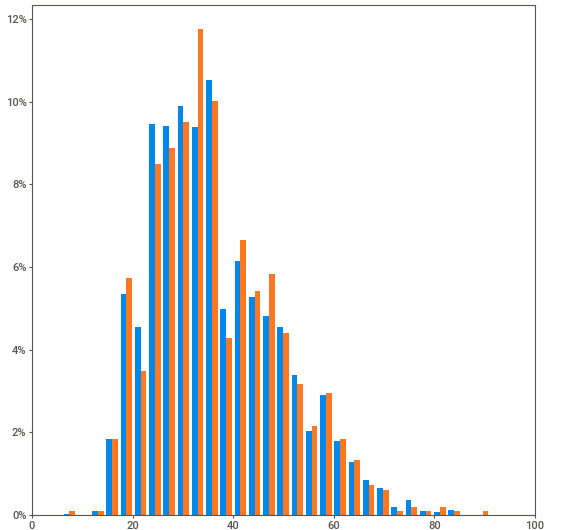
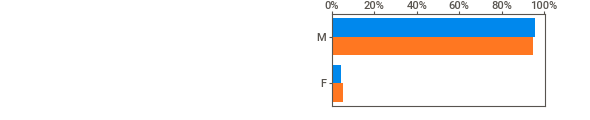
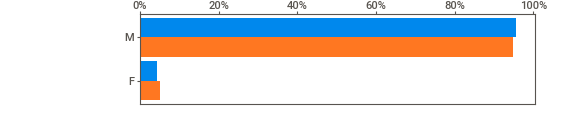
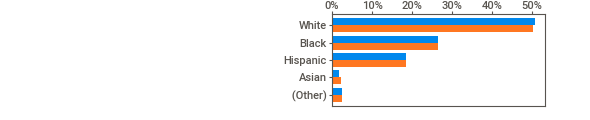
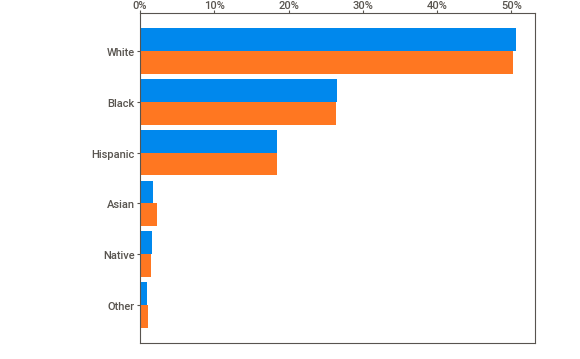
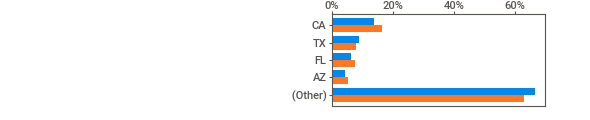
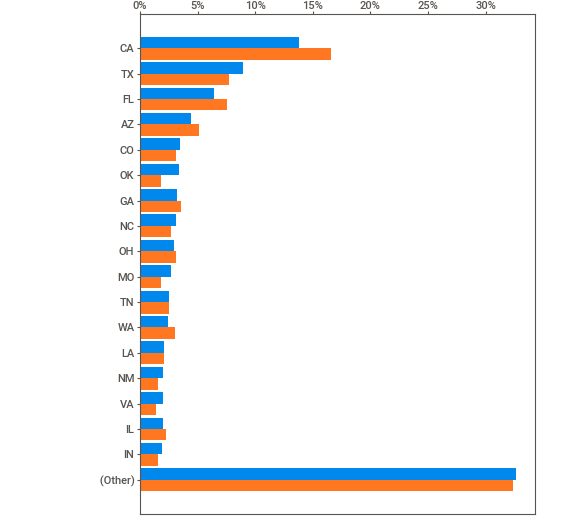
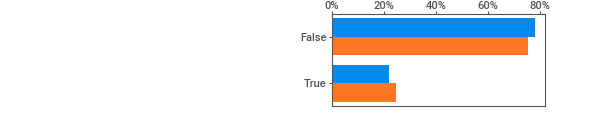
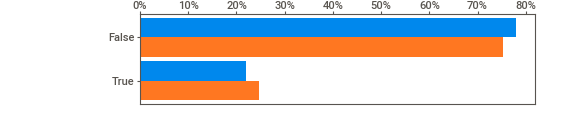
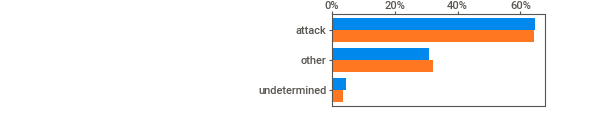
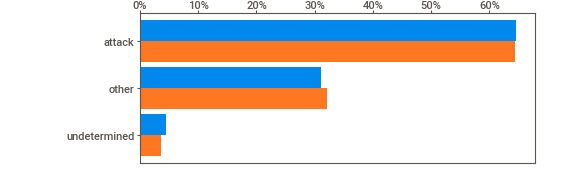
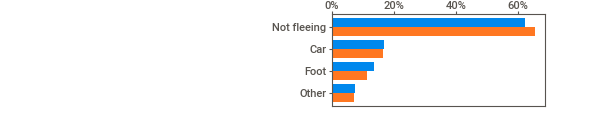
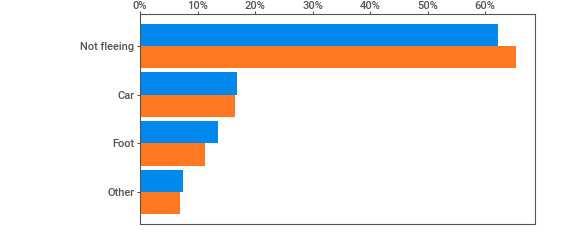
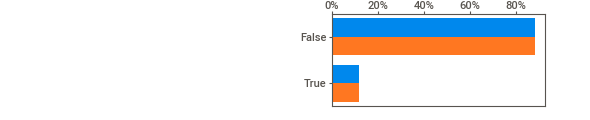
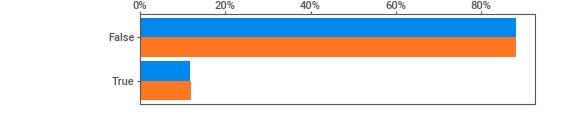
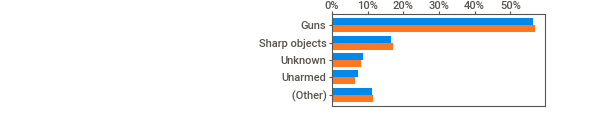
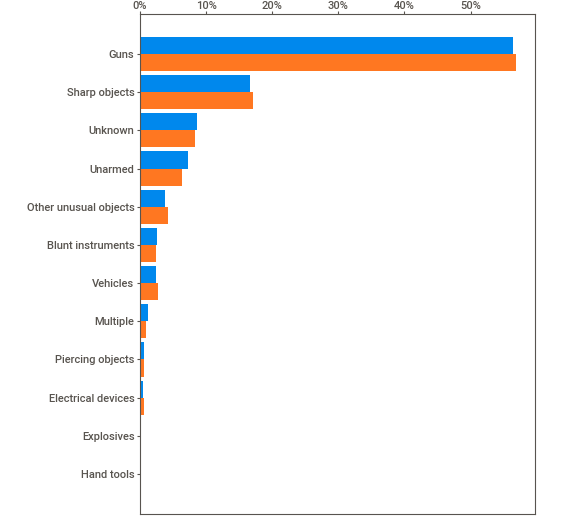
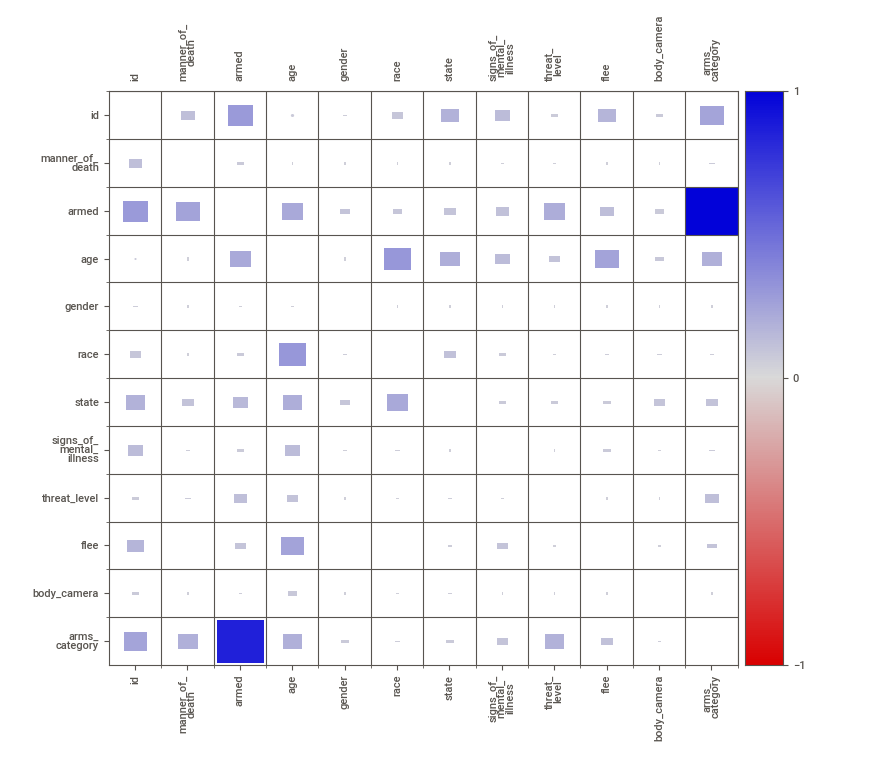
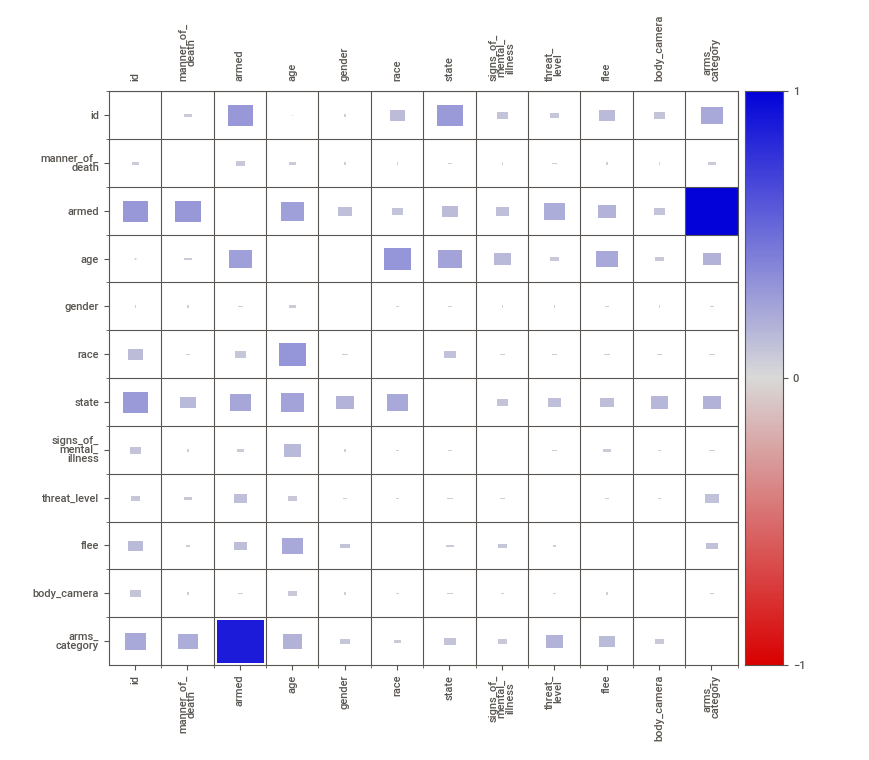

In [26]:
IPython.display.HTML('shootings_comparison.html')

In [27]:
#summary stats table transposed for df
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,4895.0,2902.148519,1683.467910,3.0,1441.5,2847.0,4352.5,5925.0
age,4895.0,36.549750,12.694348,6.0,27.0,35.0,45.0,91.0


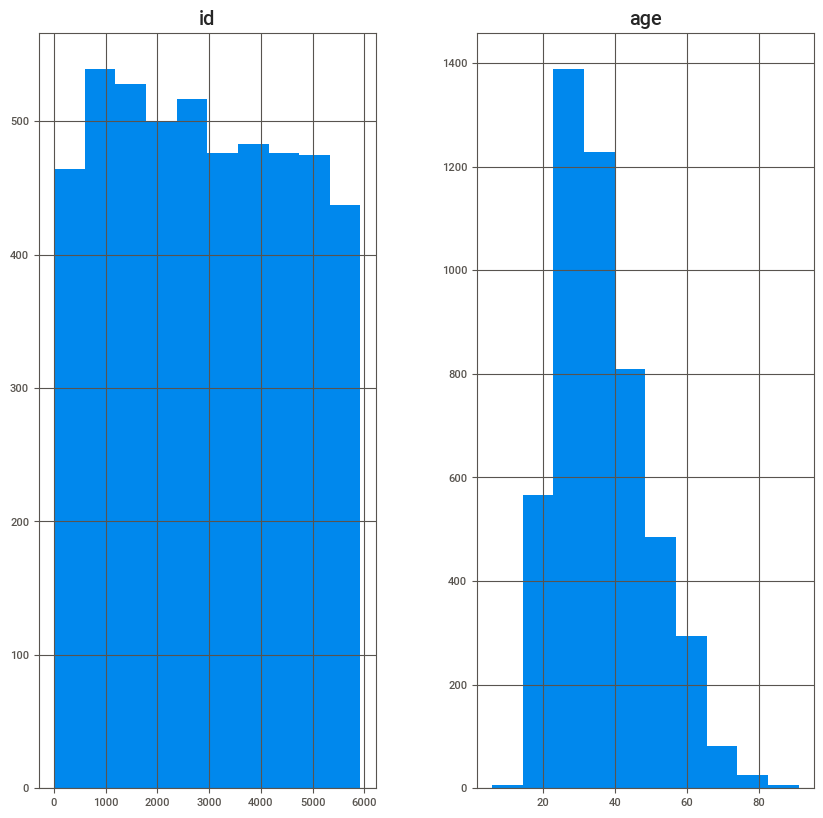

In [28]:
hist = df.hist(bins=10,figsize =(10,10))